# Smooth for each level of categorical variable
Fitting a seperate smooth for each level can be done using a categorical by variable, e.g. `S("x", by="group")`. Some points to notice:

- Such smooths are centered, so we generally must include the categorical variable as a linear term too, i.e. `L("group")` below.
- The left plot shows each of the fitted smooths $\pm$ 2 standard errors, along with the partial residuals.
- The right plot shows the main effect from `L("group")`, with the "caps" showing $\pm$ 2 standard errors, and the "jitter" points showing the partial residuals. Note that the first level of the categorical variable has a partial effect fixed to zero. This is a constraint to prevent indeterminacy (with the intercept term).

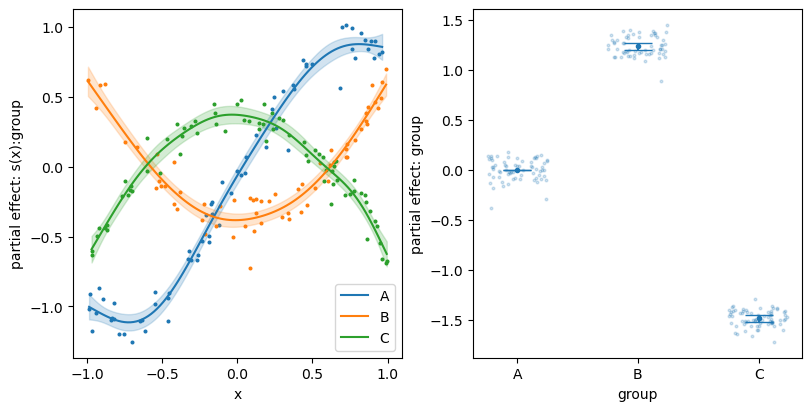

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pymgcv.gam import GAM
from pymgcv.plot import plot_continuous_1d, plot_categorical
from pymgcv.terms import Linear as L
from pymgcv.terms import Smooth as S

rng = np.random.default_rng(0)
x = rng.uniform(-1, 1, size=200)
group = pd.Series(rng.choice(["A", "B", "C"], size=len(x)), dtype="category")

y = rng.normal(scale=0.1, size=len(x))
y[group == "A"] += np.sin(x * 2)[group == "A"]
y[group == "B"] += (x**2)[group == "B"] + 1 
y[group == "C"] += -(x**2)[group == "C"] - 1 
data = pd.DataFrame({"x": x, "y": y, "group": group})

gam = GAM({"y": S("x", by="group") + L("group")})
fit = gam.fit(data)
fig, axes = plt.subplots(ncols=2, layout="constrained", figsize=(8, 4))

for by_val in ["A", "B", "C"]:
    axes[0] = plot_continuous_1d(
        target="y",
        term=S("x", by="group"),
        data=data,
        gam=fit,
        by_val=by_val,
        ax=axes[0],
        plot_kwargs={"label": by_val},
    )
axes[0].legend(loc="lower right")

plot_categorical(
    target="y",
    term=L("group"),
    data=data,
    gam=fit,
    ax=axes[1],
)
plt.show()